In [15]:
import pandas as pd
df_iniziale = pd.read_csv("VENEZIA_GENNAIO.csv", delimiter =';')
df_iniziale

,DATA,ORA,LIVELLO IDROMETRICO,TEMPERATURA ACQUA,TEMPERATURA ARIA,UMIDITÀ RELATIVA,PRESSIONE ATMOSFERICA,DIREZIONE VENTO,VELOCITÀ VENTO
0,2025-01-01,08:00,"0,445","8,9","4,6",95.0,"1032,2",80,"1,5"
1,2025-01-01,08:10,"0,452",NaN,NaN,NaN,NaN,65,"1,8"
2,2025-01-01,08:20,"0,465",NaN,NaN,NaN,NaN,67,"0,7"
3,2025-01-01,08:30,"0,474",NaN,NaN,NaN,NaN,63,"0,7"
4,2025-01-01,08:40,"0,48",NaN,NaN,NaN,NaN,113,1
...,...,...,...,...,...,...,...,...,...
4316,2025-01-31,07:20,"0,442",NaN,NaN,NaN,NaN,295,"1,4"
4317,2025-01-31,07:30,"0,47",NaN,NaN,NaN,NaN,310,"1,2"
4318,2025-01-31,07:40,"0,497",NaN,NaN,NaN,NaN,247,"0,6"
4319,2025-01-31,07:50,"0,515",NaN,NaN,NaN,NaN,318,"0,8"


In [36]:
import pandas as pd


file_name = "VENEZIA_GENNAIO.csv"
df = pd.read_csv(file_name, delimiter=";", dtype=str)


for col in ['LIVELLO IDROMETRICO', 'TEMPERATURA ARIA', 'UMIDITÀ RELATIVA', 'PRESSIONE ATMOSFERICA']:
    df[col] = df[col].str.replace(',', '.', regex=True).astype(float)


df['DATA_ORA'] = pd.to_datetime(df['DATA'] + ' ' + df['ORA'], format='%Y-%m-%d %H:%M', errors='coerce')


df = df[df['DATA_ORA'].dt.minute.isin([0, 10, 20, 30, 40, 50])]


df_hourly = df.groupby(df['DATA_ORA'].dt.floor('h')).agg({
    'LIVELLO IDROMETRICO': 'mean',
    'TEMPERATURA ARIA': 'mean',
    'PRESSIONE ATMOSFERICA': 'mean',
    'UMIDITÀ RELATIVA' : 'mean'
}).reset_index()


df_hourly['DATA'] = df_hourly['DATA_ORA'].dt.strftime('%Y-%m-%d')
df_hourly['ORA'] = df_hourly['DATA_ORA'].dt.strftime('%H:%M')


df_hourly = df_hourly[['DATA', 'ORA', 'LIVELLO IDROMETRICO', 'TEMPERATURA ARIA', 'PRESSIONE ATMOSFERICA', 'UMIDITÀ RELATIVA']]


df_hourly.index += 1
dati_convertiti = df_hourly
df_hourly


,DATA,ORA,LIVELLO IDROMETRICO,TEMPERATURA ARIA,PRESSIONE ATMOSFERICA,UMIDITÀ RELATIVA
1,2025-01-01,08:00,0.466667,4.6,1032.2,95.0
2,2025-01-01,09:00,0.473167,5.1,1032.5,95.0
3,2025-01-01,10:00,0.391000,4.4,1032.8,94.0
4,2025-01-01,11:00,0.206833,4.7,1031.8,95.0
5,2025-01-01,12:00,-0.040500,4.9,1031.1,94.0
...,...,...,...,...,...,...
717,2025-01-31,04:00,0.113667,6.8,1023.3,92.0
718,2025-01-31,05:00,0.178167,5.6,1023.8,92.0
719,2025-01-31,06:00,0.309000,5.3,1024.2,93.0
720,2025-01-31,07:00,0.451500,4.3,1024.8,93.0


In [34]:
dati_convertiti['LIVELLO IDROMETRICO'] = dati_convertiti['LIVELLO IDROMETRICO'].round(3).astype(str) + " m"
dati_convertiti['TEMPERATURA ARIA'] = dati_convertiti['TEMPERATURA ARIA'].round(1).astype(str) + " °C"
dati_convertiti['PRESSIONE ATMOSFERICA'] = dati_convertiti['PRESSIONE ATMOSFERICA'].astype(str) + " hPa"
dati_convertiti['UMIDITÀ RELATIVA'] = dati_convertiti['UMIDITÀ RELATIVA'].round(1).astype(str) + " %"
dati_convertiti

,DATA,ORA,LIVELLO IDROMETRICO,TEMPERATURA ARIA,PRESSIONE ATMOSFERICA,UMIDITÀ RELATIVA
1,2025-01-01,08:00,0.467 m,4.6 °C,1032.2 hPa,95.0 %
2,2025-01-01,09:00,0.473 m,5.1 °C,1032.5 hPa,95.0 %
3,2025-01-01,10:00,0.391 m,4.4 °C,1032.8 hPa,94.0 %
4,2025-01-01,11:00,0.207 m,4.7 °C,1031.8 hPa,95.0 %
5,2025-01-01,12:00,-0.04 m,4.9 °C,1031.1 hPa,94.0 %
...,...,...,...,...,...,...
717,2025-01-31,04:00,0.114 m,6.8 °C,1023.3 hPa,92.0 %
718,2025-01-31,05:00,0.178 m,5.6 °C,1023.8 hPa,92.0 %
719,2025-01-31,06:00,0.309 m,5.3 °C,1024.2 hPa,93.0 %
720,2025-01-31,07:00,0.452 m,4.3 °C,1024.8 hPa,93.0 %


In [37]:
df_giornaliero = dati_convertiti.groupby('DATA').agg({
    'LIVELLO IDROMETRICO': 'mean',
    'TEMPERATURA ARIA': 'mean',
    'PRESSIONE ATMOSFERICA': 'mean',
    'UMIDITÀ RELATIVA': 'mean'
}).reset_index()


df_giornaliero['LIVELLO IDROMETRICO'] = df_giornaliero['LIVELLO IDROMETRICO'].round(3).astype(str) + ' m'
df_giornaliero['TEMPERATURA ARIA'] = df_giornaliero['TEMPERATURA ARIA'].round(1).astype(str) + ' °C'
df_giornaliero['PRESSIONE ATMOSFERICA'] = df_giornaliero['PRESSIONE ATMOSFERICA'].round(1).astype(str) + ' hPa'
df_giornaliero['UMIDITÀ RELATIVA'] = df_giornaliero['UMIDITÀ RELATIVA'].round(1).astype(str) + ' %'

new_columns = {
    'LIVELLO IDROMETRICO': 'LIVELLO_IDROMETRICO_GIORNALIERA',
    'TEMPERATURA ARIA': 'TEMPERATURA_ARIA_GIORNALIERA',
    'PRESSIONE ATMOSFERICA': 'PRESSIONE ATMOSFERICA',  # questa rimane uguale
    'UMIDITÀ RELATIVA': 'UMIDITÀ RELATIVA'  # questa rimane uguale
}


df_giornaliero = df_giornaliero.rename(columns=new_columns)
df_giornaliero.index += 1
df_giornaliero

,DATA,LIVELLO_IDROMETRICO_GIORNALIERA,TEMPERATURA_ARIA_GIORNALIERA,PRESSIONE ATMOSFERICA,UMIDITÀ RELATIVA
1,2025-01-01,0.006 m,5.4 °C,1030.3 hPa,94.2 %
2,2025-01-02,0.112 m,5.9 °C,1021.4 hPa,89.6 %
3,2025-01-03,0.14 m,6.5 °C,1015.2 hPa,85.2 %
4,2025-01-04,0.095 m,4.6 °C,1021.5 hPa,74.9 %
5,2025-01-05,0.17 m,4.2 °C,1018.3 hPa,80.9 %
6,2025-01-06,0.277 m,5.7 °C,1013.2 hPa,85.3 %
7,2025-01-07,0.37 m,7.2 °C,1008.7 hPa,92.7 %
8,2025-01-08,0.347 m,6.7 °C,1014.4 hPa,93.3 %
9,2025-01-09,0.427 m,8.2 °C,1009.9 hPa,94.7 %
10,2025-01-10,0.365 m,7.8 °C,1013.4 hPa,80.8 %


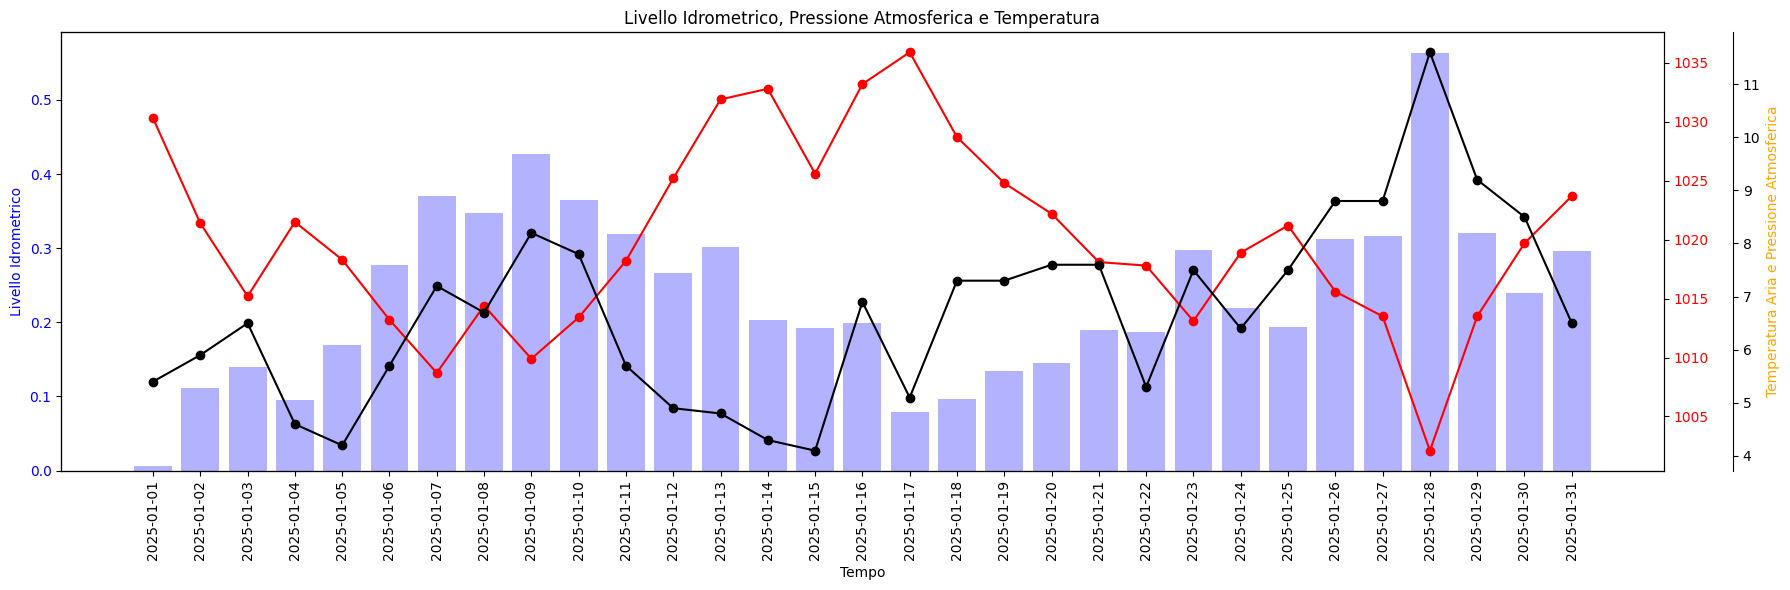

In [38]:
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots(figsize=(18, 6))


ax1.set_xticks(df_giornaliero.index)
ax1.set_xticklabels(df_giornaliero['DATA'], rotation=90)


ax1.bar(df_giornaliero.index, 
        df_giornaliero['LIVELLO_IDROMETRICO_GIORNALIERA'].str.replace(' m', '').astype(float),
        color='b', alpha=0.3, label='Livello Idrometrico')
ax1.set_xlabel("Tempo")
ax1.set_ylabel("Livello Idrometrico", color='b')
ax1.tick_params(axis='y', labelcolor='b')


ax2 = ax1.twinx()
ax2.plot(df_giornaliero.index, 
         df_giornaliero['PRESSIONE ATMOSFERICA'].str.replace(' hPa', '').astype(float),
         color='r', marker='o', label='Pressione Atmosferica')
ax2.tick_params(axis='y', labelcolor='r')


ax3 = ax1.twinx()
ax3.spines['right'].set_position(("outward", 50)) 
ax3.plot(df_giornaliero.index, 
         df_giornaliero['TEMPERATURA_ARIA_GIORNALIERA'].str.replace(' °C', '').astype(float),
         color='black', marker='o', label='Temperatura Aria')
ax3.set_ylabel("Temperatura Aria e Pressione Atmosferica", color='orange')
ax3.tick_params(axis='y', labelcolor='black')


plt.title("Livello Idrometrico, Pressione Atmosferica e Temperatura")
plt.tight_layout()
plt.show()

In [39]:
import pandas as pd


df_giornaliero_clean = df_giornaliero.copy()

df_giornaliero_clean["LIVELLO_IDROMETRICO_GIORNALIERA"] = df_giornaliero["LIVELLO_IDROMETRICO_GIORNALIERA"].str.replace(' m', '').astype(float)
df_giornaliero_clean["TEMPERATURA_ARIA_GIORNALIERA"] = df_giornaliero["TEMPERATURA_ARIA_GIORNALIERA"].str.replace(' °C', '').astype(float)
df_giornaliero_clean["PRESSIONE ATMOSFERICA"] = df_giornaliero["PRESSIONE ATMOSFERICA"].str.replace(' hPa', '').astype(float)
df_giornaliero_clean["UMIDITÀ RELATIVA"] = df_giornaliero["UMIDITÀ RELATIVA"].str.replace(' %', '').astype(float)


correlation_pressione = df_giornaliero_clean["LIVELLO_IDROMETRICO_GIORNALIERA"].corr(df_giornaliero_clean["PRESSIONE ATMOSFERICA"], method="pearson")
correlation_temperatura = df_giornaliero_clean["LIVELLO_IDROMETRICO_GIORNALIERA"].corr(df_giornaliero_clean["TEMPERATURA_ARIA_GIORNALIERA"], method="pearson")
correlation_umidita = df_giornaliero_clean["LIVELLO_IDROMETRICO_GIORNALIERA"].corr(df_giornaliero_clean["UMIDITÀ RELATIVA"], method="pearson")

print(f"Coefficiente di correlazione tra LIVELLO IDROMETRICO e PRESSIONE ATMOSFERICA: {correlation_pressione:.3f}")
print(f"Coefficiente di correlazione tra LIVELLO IDROMETRICO e TEMPERATURA ARIA: {correlation_temperatura:.3f}")
print(f"Coefficiente di correlazione tra LIVELLO IDROMETRICO e UMIDITÀ RELATIVA: {correlation_umidita:.3f}")

Coefficiente di correlazione tra LIVELLO IDROMETRICO e PRESSIONE ATMOSFERICA: -0.703
Coefficiente di correlazione tra LIVELLO IDROMETRICO e TEMPERATURA ARIA: 0.577
Coefficiente di correlazione tra LIVELLO IDROMETRICO e UMIDITÀ RELATIVA: 0.184


In [40]:
import pandas as pd


df_correlation_matrice = df_giornaliero_clean[[
    "LIVELLO_IDROMETRICO_GIORNALIERA", 
    "PRESSIONE ATMOSFERICA", 
    "TEMPERATURA_ARIA_GIORNALIERA", 
    "UMIDITÀ RELATIVA"
]].corr(method="pearson")


df_correlation_matrice

,LIVELLO_IDROMETRICO_GIORNALIERA,PRESSIONE ATMOSFERICA,TEMPERATURA_ARIA_GIORNALIERA,UMIDITÀ RELATIVA
LIVELLO_IDROMETRICO_GIORNALIERA,1.000000,-0.702782,0.576564,0.183759
PRESSIONE ATMOSFERICA,-0.702782,1.000000,-0.618898,-0.569039
TEMPERATURA_ARIA_GIORNALIERA,0.576564,-0.618898,1.000000,0.448484
UMIDITÀ RELATIVA,0.183759,-0.569039,0.448484,1.000000


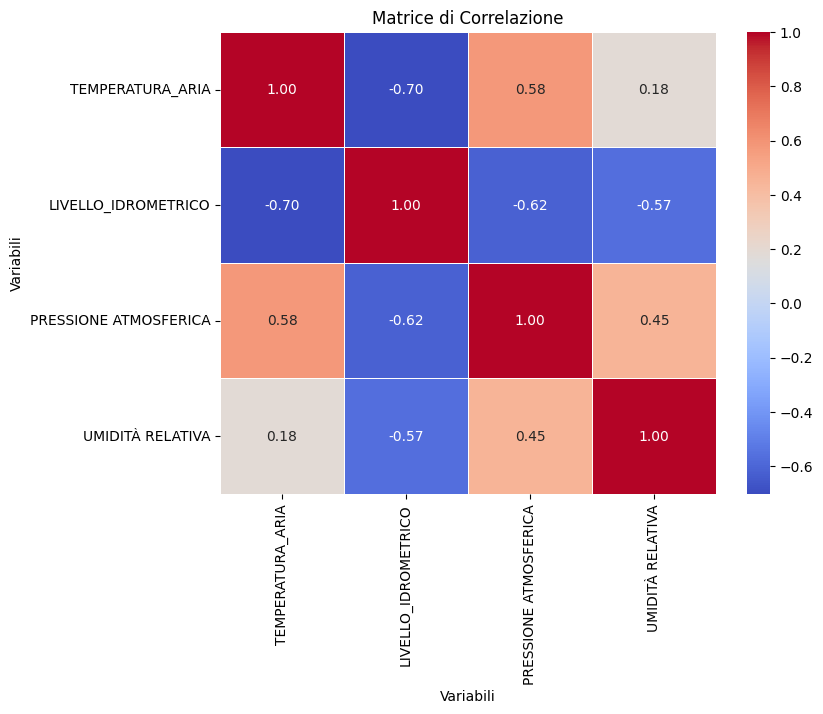

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.heatmap(df_correlation_matrice, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, 
            xticklabels=["TEMPERATURA_ARIA", "LIVELLO_IDROMETRICO", "PRESSIONE ATMOSFERICA", "UMIDITÀ RELATIVA"],
            yticklabels=["TEMPERATURA_ARIA", "LIVELLO_IDROMETRICO", "PRESSIONE ATMOSFERICA", "UMIDITÀ RELATIVA"])

plt.title("Matrice di Correlazione")
plt.xlabel("Variabili")
plt.ylabel("Variabili")
plt.show()